<a href="https://colab.research.google.com/github/rodrigoromanguzman/Actividades_Aprendizaje-/blob/main/Image_enhancement_Equipo9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [1]:
!pip install image-slicer #usado para instalar image-slicer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.4 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [2]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage import exposure
import skimage
from skimage import img_as_ubyte
from scipy.ndimage.filters import gaussian_filter as gauss
from scipy.ndimage.filters import median_filter as med
import cv2

import image_slicer
from image_slicer import join
import imageio

## 1. Investiga e implementa el método tile-based histogram equalization. En estos métodos, la imagen se particiona en diferentes ventanas (i.e. mosaicos) y los histogramas se calculan de forma independiente, aplicando la corrección sobre cada ventana. Existe un compromiso entre el tamaño de la ventana y la complejidad computacional, por lo cual es más complejo que el método simple. Implementa esta versión y realiza algunas pruebas variando el tamaño de la ventana. Otro inconveniente es que se puede observar posibles diferencias entre los el contraste de los bloques, ¿cómo podría mejorarse?

**¿Qué es el método de ecualización por pantallas o bloques?**

El método “tile-based histogram equalization” o también conocido como ecualización de histograma adaptable (AHE)

Es una técnica de procesamiento de imágenes digitales que se utiliza para mejorar el contraste de las imágenes. 

Se diferencia de la ecualización de histograma normal en que el método adaptativo mejora el contraste localmente. Divide la imagen en bloques distintos y calcula la ecualización del histograma para cada sección. Por lo tanto, AHE calcula muchos histogramas, cada uno de los cuales corresponde a una sección distinta de la imagen. 

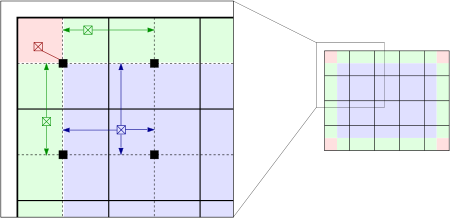

Mejora el contraste local y las definiciones de los bordes en todas las regiones distintas de la imagen.

Tiene la desventaja que por lo general suele dejar marcado los bloques que se usaron en la imagen y puede tomar muchos recursos computacionales dependiendo del tamaño de los bloques y el tamaño de la imagen a usar.


In [4]:
img = 'data/leaf.jpg' #la imagen que se usara 

original = cv2.imread(img)

p = 9 #numero de particiones
tiles = image_slicer.slice(img, p) #partimos las imagenes con el numero de particiones
print(tiles)

for tile in tiles: #cicalmos cada bloque o tile
    img = imageio.imread(tile.filename) #leemos cada imagen

    equ = exposure.equalize_hist(img) #equalizamos el bloque o tile

    byte_image = img_as_ubyte(equ) 
    original_color = cv2.cvtColor(byte_image, cv2.COLOR_BGR2RGB) #cambiamos de al color original

    cv2.imwrite(tile.filename, original_color) #guardamos las nuevas imagenes
    tile.image = Image.open(tile.filename)

image = join(tiles) #Unimos todas las imagenes en una sola

plt.title(f"Original")
plt.imshow(original)
plt.show()

plt.title(f"Tile-based histogram")
plt.imshow(image)
plt.show()

FileNotFoundError: ignored

**realiza algunas pruebas variando el tamaño de la ventana. Otro inconveniente es que se puede observar posibles diferencias entre el contraste de los bloques**

Haremos lo mismo, pero incrementaremos la resolución de la imagen y el número de bloques calculados


Original size: 1280 x 720
New size: 1920 x 1080


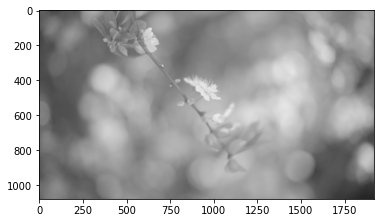

In [ ]:
from PIL import Image, ImageOps

# Load the image array into a PIL Image
orig_img = Image.open('data/leaf.jpg')

# Get the image size
o_h, o_w = orig_img.size
print('Original size:', o_h, 'x', o_w)

# We'll resize the image
target_size = (1920, 1080) #asignamos el tamaño deseado
new_img = orig_img.resize(target_size)
n_h, n_w = new_img.size
print('New size:', n_h, 'x', n_w)

byte_image = img_as_ubyte(new_img)
original_color = cv2.cvtColor(byte_image, cv2.COLOR_BGR2RGB)

cv2.imwrite('data/leaf_scaled.jpg', original_color)

plt.imshow(new_img)
plt.show()

La imagen ahora tiene un tamaño de: 1920 x 1080, esencialmente x0.5 + del original.

(<Tile #1 - leaf_scaled_01_01.png>, <Tile #2 - leaf_scaled_01_02.png>, <Tile #3 - leaf_scaled_01_03.png>, <Tile #4 - leaf_scaled_01_04.png>, <Tile #5 - leaf_scaled_01_05.png>, <Tile #6 - leaf_scaled_01_06.png>, <Tile #7 - leaf_scaled_01_07.png>, <Tile #8 - leaf_scaled_01_08.png>, <Tile #9 - leaf_scaled_02_01.png>, <Tile #10 - leaf_scaled_02_02.png>, <Tile #11 - leaf_scaled_02_03.png>, <Tile #12 - leaf_scaled_02_04.png>, <Tile #13 - leaf_scaled_02_05.png>, <Tile #14 - leaf_scaled_02_06.png>, <Tile #15 - leaf_scaled_02_07.png>, <Tile #16 - leaf_scaled_02_08.png>, <Tile #17 - leaf_scaled_03_01.png>, <Tile #18 - leaf_scaled_03_02.png>, <Tile #19 - leaf_scaled_03_03.png>, <Tile #20 - leaf_scaled_03_04.png>, <Tile #21 - leaf_scaled_03_05.png>, <Tile #22 - leaf_scaled_03_06.png>, <Tile #23 - leaf_scaled_03_07.png>, <Tile #24 - leaf_scaled_03_08.png>, <Tile #25 - leaf_scaled_04_01.png>, <Tile #26 - leaf_scaled_04_02.png>, <Tile #27 - leaf_scaled_04_03.png>, <Tile #28 - leaf_scaled_04_04.png>, 

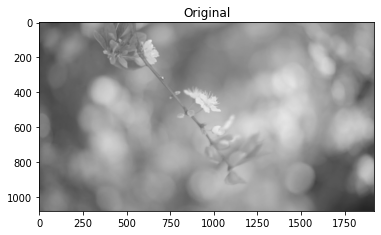

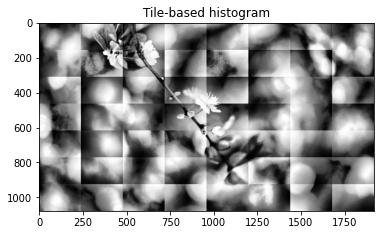

In [ ]:
img = 'data/leaf_scaled.jpg' #la imagen que se usara 

original = cv2.imread(img)

p = 56 #numero de particiones
tiles = image_slicer.slice(img, p) #partimos las imagenes con el numero de particiones
print(tiles)

for tile in tiles: #cicalmos cada bloque o tile
    img = imageio.imread(tile.filename) #leemos cada imagen

    equ = exposure.equalize_hist(img) #equalizamos el bloque o tile

    byte_image = img_as_ubyte(equ) 
    original_color = cv2.cvtColor(byte_image, cv2.COLOR_BGR2RGB) #cambiamos de al color original

    cv2.imwrite(tile.filename, original_color) #guardamos las nuevas imagenes
    tile.image = Image.open(tile.filename)

image = join(tiles) #Unimos todas las imagenes en una sola

plt.title(f"Original")
plt.imshow(original)
plt.show()

plt.title(f"Tile-based histogram")
plt.imshow(image)
plt.show()

Ahora podemos observar que por el tono de cada histograma en cada bloquee cada uno se procesa de manera distinta y se puede notar mucho la diferencia y en especial la parte superior se puede notar un poco el ruido que se mantiene en cada bloquee

**¿cómo podría mejorarse?**

 AHE tiene una tendencia a sobre amplificar el ruido en regiones relativamente homogéneas de una imagen, sin mencionar que usualmente se notan los cuadros o bloques dentro de la imagen.

Una manera de resolver esto sería similar a la implementación de contraste limitado.

La implementación de contraste limitado (CL) limita la amplificación recortando el histograma en un valor predefinido antes de calcular la CDF. 

Ese recorte o exceso se aplica al resto del histograma y se aplica luego el CFD

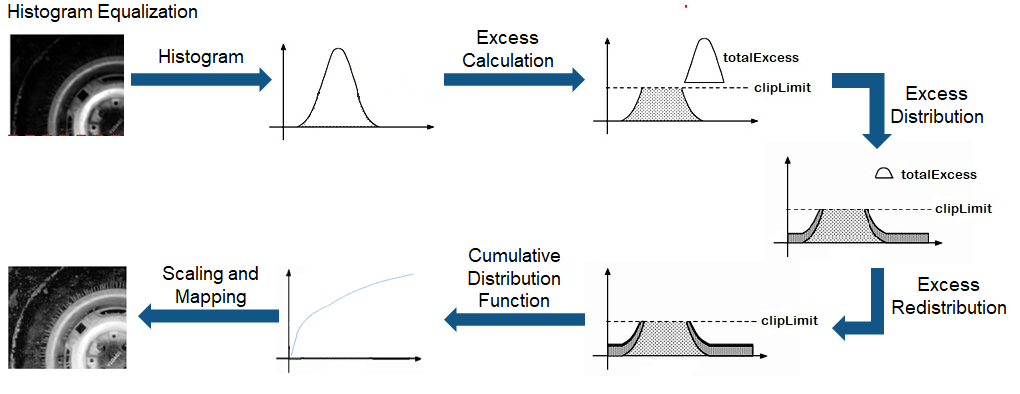

Esto limita la pendiente de la CDF y por lo tanto de la función de transformación, lo cual nos ayuda a suavizar la imagen y cada bloque en el que se dividió


# Referencias



Pregunta 1:

GeeksforGeeks. (2021, November 22). Adaptive histogram equalization in image processing using MATLAB. GeeksforGeeks. Retrieved January 25, 2023, from https://www.geeksforgeeks.org/adaptive-histogram-equalization-in-image-processing-using-matlab/ 


Contrast Limited adaptive histogram equalization. Contrast Limited Adaptive Histogram Equalization - MATLAB &amp; Simulink - MathWorks 中国. (n.d.). Retrieved January 25, 2023, from https://ww2.mathworks.cn/help/visionhdl/ug/contrast-adaptive-histogram-equalization.html 


Wikimedia Foundation. (2022, October 12). Adaptive histogram equalization. Wikipedia. Retrieved January 25, 2023, from https://en.wikipedia.org/wiki/Adaptive_histogram_equalization 

<h2><b>3. Investiga cómo funciona el algoritmo CLAHE (contrast limited adaptive histogram equalization) y realiza una implementación (puede ser usando la implementación de OpenCV). Prueba sobre diferentes tipos de imágenes y compara con el método de ecualización de histogramas básico. Provee una breve descripción del método a partir de una  investigación bibliográfica.</b></h2>
<h4>CLAHE (Contrast Limited Adaptive Histogram Equalization) es un algoritmo de mejora de imagen que se utiliza para mejorar el contraste en imágenes con iluminación no uniforme. El algoritmo se basa en el algoritmo de Ecualización de Histograma Adaptativo (AHE), el cual es una variación de la ecualización de histograma tradicional que se divide en pequeñas regiones (llamadas "ventanas") de la imagen, y aplica ecualización de histograma en cada ventana de forma independiente. Sin embargo el algoritmo CLAHE incluye un mecanismo de límite de contraste para evitar la amplificación excesiva de los ruidos presentes en la imagen.
El algoritmo se divide en los siguientes pasos:
<ol>
<li>
Dividir la imagen en pequeñas regiones, conocidas como ventanas. Estas ventanas son utilizadas para calcular el histograma de cada región.
</li>
<li>
Calcular el histograma para cada ventana y utilizarlo para calcular la función de ecualización de histograma local para esa ventana.
</li>
<li>
Aplicar la función de ecualización de histograma local a cada píxel en su ventana correspondiente.
</li>
<li>
Utilizar un límite de contraste para evitar la amplificación excesiva de los ruidos presentes en la imagen. El límite de contraste se utiliza para limitar la diferencia entre el valor de un píxel y el valor de su vecino.
</li>
<li>
Interpolar los valores de los píxeles entre las ventanas para suavizar las transiciones.
</li>
<li>
Aplicar un filtro gaussiano para suavizar la imagen final.
</li>
</ol>
La ventaja de CLAHE es que es capaz de mejorar el contraste en las zonas de la imagen donde la iluminación es no uniforme, mientras que AHE tiende a generar marcas y sobrexposición en estas zonas. La desventaja de CLAHE es que tiende a generar una mayor cantidad de ruido en la imagen si no se utiliza un límite de contraste adecuado.</h4>

<h2><li>Implementacion</li></h2>

In [9]:
import urllib

# Descargamos el primer ejemplo que usaremos
url = "https://images.unsplash.com/photo-1625625932339-ac2ac20493e7?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MjB8fHBuZyUyMGltYWdlc3xlbnwwfHwwfHw%3D&auto=format&fit=crop&w=800&q=60"

# Lo guardamos en formato de archivo en nuestro documento de colab
urllib.request.urlretrieve(url, "example1_clahe.jpg")
original_image = Image.open('example1_clahe.jpg')

# Tomamos el formato correcto para la imagen
np.save('example1_clahe.npy', original_image)

# Cargamos la imagen
original_image = np.load('example1_clahe.npy')

# Hacemos la lectura de la imagen
img = cv2.imread('example1_clahe.jpg')

# Convertimos la imagen a HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Aplicamos el algoritmo CLAHE al canal V
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
hsv[:,:,2] = clahe.apply(hsv[:,:,2])

# Convertimos la imagen de regreso a RGB
img_clahe = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# Guardamos la imagen
cv2.imwrite('example1_clahe.jpg', img_clahe)
clahe_image = Image.open('example1_clahe.jpg')

/usr/local/lib/python3.8/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


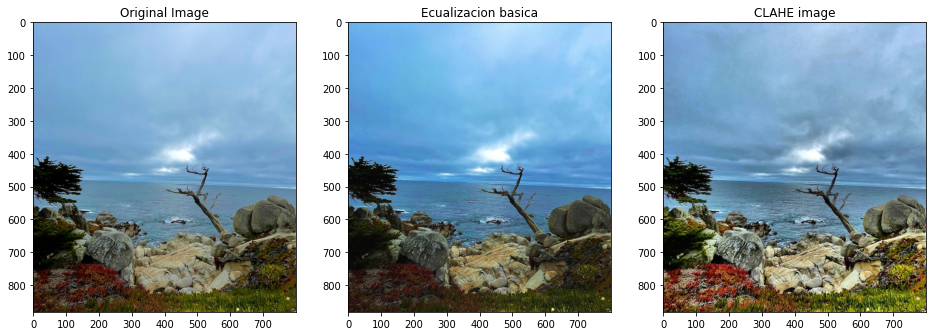

In [10]:
# Vizualizacion y comparacion de las imagenes


fig = plt.figure(figsize=(16, 8))

#1)
# Imagen Original
a=fig.add_subplot(1,3,1)
imgplot = plt.imshow(original_image)
a.set_title('Original Image')

#2)
# Imagen Ecualizada con el ecualizador basico

# Realizamos la ecualizcion basica
original_image_eq = exposure.equalize_hist(original_image)
a=fig.add_subplot(1,3,2)
imgplot = plt.imshow(original_image_eq)
a.set_title('Ecualizacion basica')

#3)
# Imagen con CLAHE
a=fig.add_subplot(1,3,3)
imgplot = plt.imshow(clahe_image)
a.set_title('CLAHE image')

plt.show()

<h3>Probamos con una imagen a blanco y negro</h3>

In [15]:
url = "https://images.unsplash.com/photo-1584555684040-bad07f46a21f?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8NHx8eHJheXxlbnwwfHwwfHw%3D&auto=format&fit=crop&w=800&q=60"

# Lo guardamos en formato de archivo en nuestro documento de colab
urllib.request.urlretrieve(url, "example1_clahe_bw.jpg")
original_image = Image.open('example1_clahe_bw.jpg')

# Tomamos el formato correcto para la imagen
np.save('example1_clahe_bw.npy', original_image)

# Cargamos la imagen
original_image = np.load('example1_clahe_bw.npy')

# Hacemos la lectura de la imagen
img = cv2.imread('example1_clahe_bw.jpg')

# Convertimos la imagen a HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Aplicamos el algoritmo CLAHE al canal V
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
hsv[:,:,2] = clahe.apply(hsv[:,:,2])

# Convertimos la imagen de regreso a RGB
img_clahe = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# Guardamos la imagen
cv2.imwrite('example1_clahe_bw.jpg', img_clahe)
clahe_image = Image.open('example1_clahe_bw.jpg')

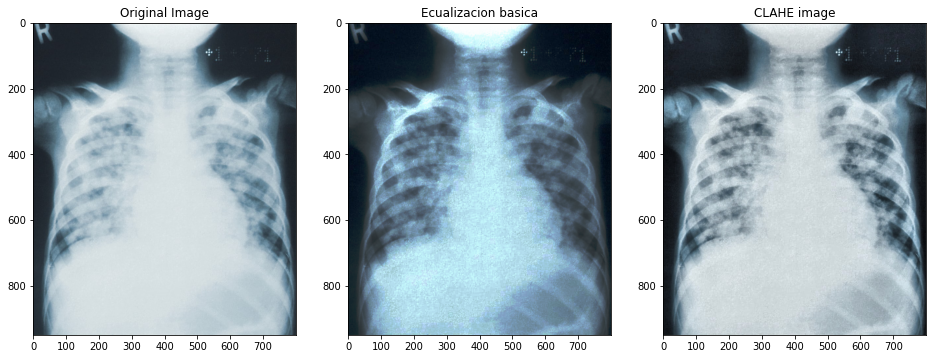

In [16]:
# Vizualizacion y comparacion de las imagenes

fig = plt.figure(figsize=(16, 8))

#1)
# Imagen Original
a=fig.add_subplot(1,3,1)
imgplot = plt.imshow(original_image)
a.set_title('Original Image')

#2)
# Imagen Ecualizada con el ecualizador basico

# Realizamos la ecualizcion basica
original_image_eq = exposure.equalize_hist(original_image)
a=fig.add_subplot(1,3,2)
imgplot = plt.imshow(original_image_eq)
a.set_title('Ecualizacion basica')

#3)
# Imagen con CLAHE
a=fig.add_subplot(1,3,3)
imgplot = plt.imshow(clahe_image)
a.set_title('CLAHE image')

plt.show()

In [18]:
url = "https://media.istockphoto.com/id/485642606/es/foto/azul-eye.jpg?s=612x612&w=0&k=20&c=mNVkykkS3j4tBXJGMpIQYo1VV_LYQ_bNJPuF6ceCKWk="

# Lo guardamos en formato de archivo en nuestro documento de colab
urllib.request.urlretrieve(url, "example1_clahe_eye.jpg")
original_image = Image.open('example1_clahe_eye.jpg')

# Tomamos el formato correcto para la imagen
np.save('example1_clahe_eye.npy', original_image)

# Cargamos la imagen
original_image = np.load('example1_clahe_eye.npy')

# Hacemos la lectura de la imagen
img = cv2.imread('example1_clahe_eye.jpg')

# Convertimos la imagen a HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Aplicamos el algoritmo CLAHE al canal V
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
hsv[:,:,2] = clahe.apply(hsv[:,:,2])

# Convertimos la imagen de regreso a RGB
img_clahe = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# Guardamos la imagen
cv2.imwrite('example1_clahe_eye.jpg', img_clahe)
clahe_image = Image.open('example1_clahe_eye.jpg')

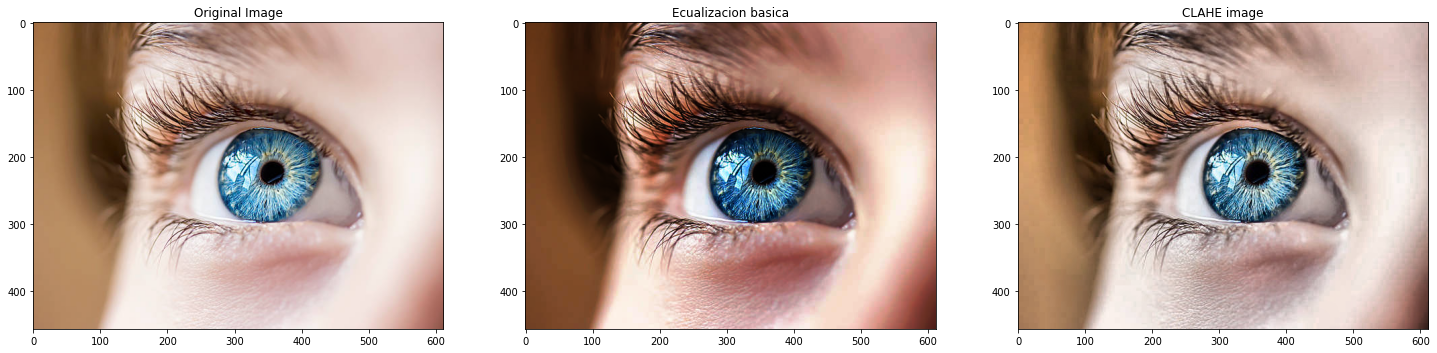

In [19]:
#Las dos imagenes
# Create a figure
fig = plt.figure(figsize=(25, 13))

# Subplot for original image
a=fig.add_subplot(1,3,1)
imgplot = plt.imshow(original_image)
a.set_title('Original Image')

# Subplot for eq image

original_image_eq = exposure.equalize_hist(original_image)
a=fig.add_subplot(1,3,2)
imgplot = plt.imshow(original_image_eq)
a.set_title('Ecualizacion basica')

a=fig.add_subplot(1,3,3)
imgplot = plt.imshow(clahe_image)
a.set_title('CLAHE image')

plt.show()

<h3>Referencias</h3>
<p><li>Gonzalez, R. C., & Woods, R. E. (2018). Digital Image Processing (4th ed.). Prentice-Hall.</li></p>
<p><li>
Khan, M. A., & Khan, M. R. (2015). Contrast Limited Adaptive Histogram Equalization (CLAHE) Approach for Enhancement of the Microstructures of Friction Stir Welded Joints. Journal of Materials Engineering and Performance, 24(5), 2039-2046. doi: 10.1007/s11665-014-1329-9</li></p>
<p><li>Wikipedia. (2023). Adaptive Histogram Equalization. Retrieved from https://en.wikipedia.org/wiki/Adaptive_histogram_equalization</li></p>
